In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.sample(5)

,Survived,Age,Fare
771,0,48.0,7.8542
64,0,NaN,27.7208
472,1,33.0,27.7500
613,0,NaN,7.7500
119,0,2.0,31.2750


In [5]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived'] 

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [8]:
X_train.shape,X_test.shape

((712, 2), (179, 2))

In [9]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

/tmp/ipykernel_5073/1230362693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_imputed'] = X_train['Age']
/tmp/ipykernel_5073/1230362693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age_imputed'] = X_test['Age']


In [10]:
X_train.tail()

,Age,Fare,Age_imputed
182,9.0,31.3875,9.0
733,23.0,13.0000,23.0
674,NaN,0.0000,NaN
604,35.0,26.5500,35.0
718,NaN,15.5000,NaN


## in ageImputed column we will fill the missing values with random values
## the random values will be from the values available there only

In [13]:
# showing only NAN values from ageImputed
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

653   NaN
522   NaN
201   NaN
26    NaN
828   NaN
       ..
511   NaN
388   NaN
629   NaN
674   NaN
718   NaN
Name: Age_imputed, Length: 155, dtype: float64

In [16]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

/home/batman/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
X_train.tail()

,Age,Fare,Age_imputed
182,9.0,31.3875,9.0
733,23.0,13.0000,23.0
674,NaN,0.0000,17.0
604,35.0,26.5500,35.0
718,NaN,15.5000,24.0


In [19]:
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

/home/batman/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [22]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([25.  , 32.  ,  9.  , 50.  , 16.  , 24.  , 42.  , 49.  , 27.  ,
       30.  , 21.  , 21.  , 18.  , 48.  , 23.  , 35.  , 60.  , 48.  ,
       27.  , 27.  , 21.  , 54.  , 42.  , 35.  , 23.  ,  2.  ,  4.  ,
       35.  , 21.  , 39.  , 18.  , 21.  , 32.  , 29.  , 28.5 , 32.  ,
       16.  , 31.  , 20.  , 39.  ,  8.  , 48.  , 29.  , 20.  , 48.  ,
        9.  , 36.  , 16.  , 33.  , 30.  , 28.  , 30.  , 25.  , 28.  ,
       42.  , 25.  , 18.  , 31.  , 45.  , 40.  , 26.  , 27.  , 25.  ,
       28.  , 28.  , 34.  , 39.  , 55.5 , 11.  , 28.  , 27.  , 36.5 ,
       35.  , 40.5 , 24.  , 25.  , 19.  , 29.  ,  1.  , 28.  , 19.  ,
       21.  , 40.  , 29.  ,  0.67, 43.  ,  0.92, 36.  , 28.  , 18.  ,
       58.  , 25.  , 51.  , 18.  , 23.  , 22.  , 24.  ,  6.  , 24.  ,
       24.  , 70.  , 70.5 , 58.  , 16.  , 16.  , 39.  , 45.  , 30.  ,
       45.  ,  1.  , 19.  , 33.  , 52.  , 31.  , 37.  , 18.  , 26.  ,
       14.  , 23.  , 19.  , 34.  , 35.  , 39.  , 27.  , 30.  , 63.  ,
       19.  , 34.  ,

In [23]:
X_train['Age'].isnull().sum()

155

In [24]:
X_train['Age_imputed'].isnull().sum()

0

In [25]:
X_train

,Age,Fare,Age_imputed
210,24.0,7.0500,24.0
261,3.0,31.3875,3.0
724,27.0,53.1000,27.0
787,8.0,29.1250,8.0
436,21.0,34.3750,21.0
...,...,...,...
182,9.0,31.3875,9.0
733,23.0,13.0000,23.0
674,NaN,0.0000,17.0
604,35.0,26.5500,35.0


/home/batman/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/batman/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


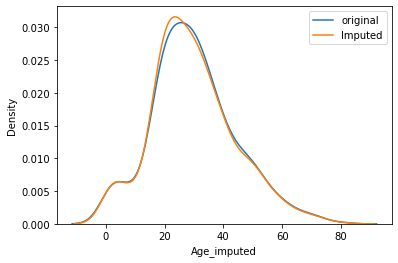

In [27]:
sns.distplot(X_train['Age'],label='original',hist=False)
sns.distplot(X_train['Age_imputed'],label='Imputed',hist=False)
plt.legend()
plt.show()

In [28]:
print("Orignal variable variance", X_train['Age'].var())
print("Variance after random imputation", X_train['Age_imputed'].var())

Orignal variable variance 204.84712788577045
Variance after random imputation 202.38197410495587


In [29]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2707.277084,73.061433,62.983364
Age,73.061433,204.847128,204.847128
Age_imputed,62.983364,204.847128,202.381974


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


### cov score will differ

<AxesSubplot:>

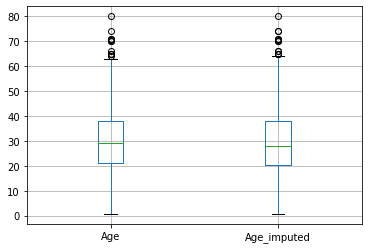

In [30]:
X_train[['Age','Age_imputed']].boxplot()

# we should use random state in production when using randomSampleImputation


In [40]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))


NameError: name 'observation' is not defined

# 2nd dataset

In [41]:
data = pd.read_csv('house_values.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [42]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [43]:
data.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [44]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

## we are taking whole data in X

In [45]:
X = data
y = data['SalePrice']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [47]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed']=X_test['FireplaceQu']

/tmp/ipykernel_5073/1649534937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'] = X_train['GarageQual']
/tmp/ipykernel_5073/1649534937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'] = X_test['GarageQual']
/tmp/ipykernel_5073/1649534937.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [48]:
X_train.sample(4)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
347,Gd,TA,157500,TA,Gd
345,Gd,TA,140200,TA,Gd
339,NaN,TA,155000,TA,NaN
333,Gd,TA,207000,TA,Gd


In [49]:
X_train['GarageQual'].mode()

0    TA
dtype: object

In [51]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]= X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()]= X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

/tmp/ipykernel_5073/3449248766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]= X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
/home/batman/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/tmp/ipykernel_5073/3449248766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [52]:
X_train

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1330,Gd,TA,227000,TA,Gd
138,TA,TA,230000,TA,TA
374,Gd,TA,219500,TA,Gd
743,TA,TA,175000,TA,TA
859,Gd,TA,250000,TA,Gd
...,...,...,...,...,...
380,Gd,TA,127000,TA,Gd
1145,Gd,TA,149000,TA,Gd
566,Gd,TA,325000,TA,Gd
1185,NaN,TA,104900,TA,NaN


In [54]:
X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()]=X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

/tmp/ipykernel_5073/2793315294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
/home/batman/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/tmp/ipykernel_5073/2793315294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [55]:
X_train

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1330,Gd,TA,227000,TA,Gd
138,TA,TA,230000,TA,TA
374,Gd,TA,219500,TA,Gd
743,TA,TA,175000,TA,TA
859,Gd,TA,250000,TA,Gd
...,...,...,...,...,...
380,Gd,TA,127000,TA,Gd
1145,Gd,TA,149000,TA,Gd
566,Gd,TA,325000,TA,Gd
1185,NaN,TA,104900,TA,Gd


In [56]:
X_train['GarageQual'].value_counts()

TA    1049
Fa      39
Gd      11
Ex       3
Po       1
Name: GarageQual, dtype: int64

In [58]:
temp = pd.concat([
    X_train['GarageQual'].value_counts() /len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_imputed'].value_counts() / len(X_train)
],axis = 1)

temp.columns = ['Original','Imputed']

In [59]:
temp

,Original,Imputed
TA,0.951043,0.952055
Fa,0.035358,0.035103
Gd,0.009973,0.009418
Ex,0.002720,0.002568
Po,0.000907,0.000856


In [64]:
temp = pd.concat([
    X_train['FireplaceQu'].value_counts() /len(X_train['FireplaceQu'].dropna()),
    X_train['FireplaceQu_imputed'].value_counts() / len(data)
],axis=1)

temp.columns=['Original','Imputed']

In [65]:
temp

,Original,Imputed
Gd,0.495987,0.398630
TA,0.398074,0.319178
Fa,0.048154,0.039041
Ex,0.033708,0.026712
Po,0.024077,0.016438


/home/batman/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/batman/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/batman/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

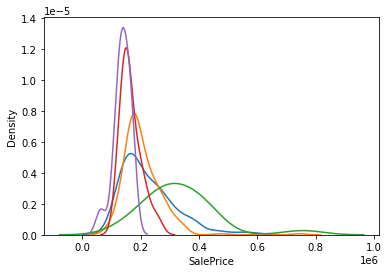

In [66]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

/home/batman/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/batman/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/batman/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

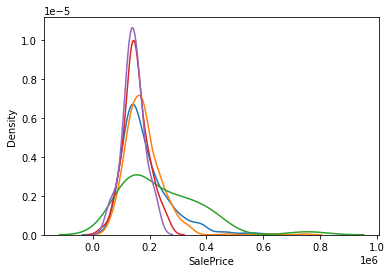

In [67]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()